#### (1) 데이터 가져오기
---
* sklearn.datasets의 load_diabetes에서 데이터를 가져와주세요.
* diabetes의 data를 df_X에, target을 df_y에 저장해주세요.


In [1]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target


#### (2) 모델에 입력할 데이터 X 준비하기
---
* df_X에 있는 값들을 numpy array로 변환해서 저장해주세요.


In [2]:
import numpy as np

df_X = np.array(df_X)


#### (3) 모델에 예측할 데이터 y 준비하기
---
* df_y에 있는 값들을 numpy array로 변환해서 저장해주세요.


In [3]:
df_y = np.array(df_y)


#### (4) train 데이터와 test 데이터로 분리하기
---
* X와 y 데이터를 각각 train 데이터와 test 데이터로 분리해주세요.


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


#### (5) 모델 준비하기
---
* 입력 데이터 개수에 맞는 가중치 W와 b를 준비해주세요.
*모델 함수를 구현해주세요.


In [5]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += W[i] * X[:, i] 
    predictions += b
    return predictions

#### (6) 손실함수 loss 정의하기
---
* 손실함수를 MSE 함수로 정의해주세요.


In [6]:
def loss(X, y, W, b):
    predictions = model(X, W, b)
    mse = ((predictions - y) ** 2).mean()
    return mse

#### (7) 기울기를 구하는 gradient 함수 구현하기
---
* 기울기를 계산하는 gradient 함수를 구현해주세요.


In [7]:
def gradient(X, y, W, b):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

#### (8) 하이퍼 파라미터인 학습률 설정하기
---
* 학습률, learning rate 를 설정해주세요
* 만약 학습이 잘 되지 않는다면 learning rate 값을 한번 여러 가지로 설정하며 실험해 보세요.


In [16]:
LEARNING_RATE = 0.5# 0.0001

#### (9) 모델 학습하기
---
* 정의된 손실함수와 기울기 함수로 모델을 학습해주세요.
* loss값이 충분히 떨어질 때까지 학습을 진행해주세요.
* 입력하는 데이터인 X에 들어가는 특성 컬럼들을 몇 개 빼도 괜찮습니다. 다양한 데이터로 실험해 보세요.


Iterataion 10 : Loss 3840.1224
Iterataion 20 : Loss 3770.2247
Iterataion 30 : Loss 3707.8623
Iterataion 40 : Loss 3651.9873
Iterataion 50 : Loss 3601.7149
Iterataion 60 : Loss 3556.2970
Iterataion 70 : Loss 3515.1004
Iterataion 80 : Loss 3477.5876
Iterataion 90 : Loss 3443.3023
Iterataion 100 : Loss 3411.8556
Iterataion 110 : Loss 3382.9156
Iterataion 120 : Loss 3356.1986
Iterataion 130 : Loss 3331.4609
Iterataion 140 : Loss 3308.4930
Iterataion 150 : Loss 3287.1140
Iterataion 160 : Loss 3267.1676
Iterataion 170 : Loss 3248.5177
Iterataion 180 : Loss 3231.0457
Iterataion 190 : Loss 3214.6479
Iterataion 200 : Loss 3199.2331
Iterataion 210 : Loss 3184.7210
Iterataion 220 : Loss 3171.0405
Iterataion 230 : Loss 3158.1282
Iterataion 240 : Loss 3145.9276
Iterataion 250 : Loss 3134.3880
Iterataion 260 : Loss 3123.4640
Iterataion 270 : Loss 3113.1142
Iterataion 280 : Loss 3103.3013
Iterataion 290 : Loss 3093.9914
Iterataion 300 : Loss 3085.1533
Iterataion 310 : Loss 3076.7585
Iterataion 320 : 

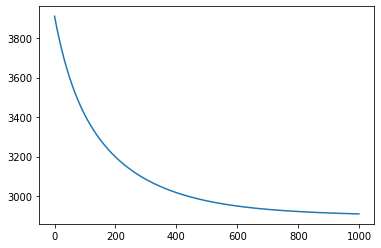

In [17]:
losses = []
for i in range(1, 1001):
    dW, db = gradient(X_train, y_train, W, b)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, y_train, W, b)
    losses.append(L)
    if i % 10 == 0:
        print('Iterataion %d : Loss %0.4f' % (i, L))

from IPython.display import display, Image
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

#### (10) test 데이터에 대한 성능 확인하기
---
* test 데이터에 대한 성능을 확인해주세요.


In [18]:
prediction = model(X_test, W, b)
mse = loss(X_test, y_test, W, b)
prediction, mse

(array([141.93213304, 178.07409939, 141.15215509, 290.4101576 ,
        123.90225883,  97.48725465, 253.14091692, 190.87407378,
         87.3691957 , 114.57995538,  95.95935258, 155.99857323,
         65.8509593 , 208.57609353, 104.39958601, 135.25205122,
        223.17021837, 246.41639307, 194.62368243, 213.43079809,
        202.03096734,  88.8876964 ,  75.74461278, 188.40686261,
        154.63280137, 164.16559217, 188.15778017, 176.27289508,
         51.54502287, 115.78305668, 180.11180696,  93.93712054,
        132.82665536, 181.65127181, 172.97444393, 189.82819104,
        126.06483223, 122.44474952, 151.33957003,  61.05142388,
         80.56386832, 111.24575226, 159.13969795, 152.63243004,
        174.05230893,  65.73769825,  82.2083249 , 106.14974094,
         61.27089631, 155.89711351, 153.85252267,  65.71922573,
        116.13013277, 109.48794978, 169.12086215, 155.88256869,
         97.93292477, 203.87719297, 115.63198787,  68.82371024,
        183.28898032, 197.26738936, 141.

#### (11) 정답 데이터와 예측한 데이터 시각화하기
---
* x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화해 주세요.


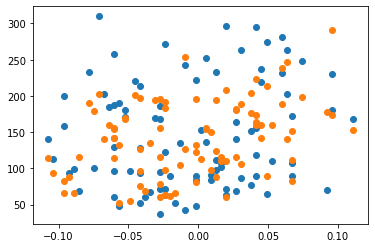

In [19]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()